In [1]:
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service 
from bs4 import BeautifulSoup
import re 
import time 
import pandas as pd

In [2]:
#Start and open the site
service = Service('/Users/rayzhang/Desktop/Code/chromedriver') #Insert path here
service.start()
driver = webdriver.Remote(service.service_url)
driver.get('https://www.facebook.com/marketplace/category/vehicles')

In [3]:
#Sign in to Facebook
email_field = driver.find_element_by_id("email")
pass_field = driver.find_element_by_id("pass")
login_button = driver.find_element_by_id("loginbutton")

email_in = input(print("Enter email here: "))
pass_in = input(print("Enter password here: "))

email_field.send_keys(email_in)
pass_field.send_keys(pass_in)
login_button.click()

Enter email here: 
Enter password here: 


In [10]:
SCROLL_PAUSE_TIME = 5

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)
    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [4]:
soup = BeautifulSoup(driver.page_source)
name_class = "b6ax4al1 lq84ybu9 hf30pyar om3e55n1"
price_class = "gvxzyvdx aeinzg81 t7p7dqev gh25dzvf tb6i94ri gupuyl1y i2onq4tn b6ax4al1 gem102v4 ncib64c9 mrvwc6qr sx8pxkcf f597kf1v cpcgwwas f5mw3jnl hxfwr5lz hpj0pwwo sggt6rq5 innypi6y pbevjfx6"
location_class_umbrella = "gvxzyvdx aeinzg81 t7p7dqev gh25dzvf tb6i94ri gupuyl1y i2onq4tn b6ax4al1 gem102v4 ncib64c9 mrvwc6qr sx8pxkcf f597kf1v cpcgwwas f5mw3jnl szxhu1pg nfkogyam kkmhubc1 tes86rjd rtxb060y"
location_class = "b6ax4al1 lq84ybu9 hf30pyar om3e55n1 oshhggmv qm54mken"
mileage_class = "b6ax4al1 lq84ybu9 hf30pyar om3e55n1 oshhggmv qm54mken"

<html class="_9dls __fb-light-mode" dir="ltr" id="facebook" lang="en"><head><link data-badged-icon="https://static.xx.fbcdn.net/rsrc.php/ye/r/Ta8_J_nYekI.ico" data-default-icon="https://static.xx.fbcdn.net/rsrc.php/yD/r/d4ZIVX-5C-b.ico" href="https://static.xx.fbcdn.net/rsrc.php/yD/r/d4ZIVX-5C-b.ico" rel="shortcut icon"/><meta content="width=device-width,initial-scale=1,maximum-scale=2,shrink-to-fit=no" name="viewport"/><meta content="Facebook Marketplace" name="application-name"/><meta content="https://www.facebook.com/marketplace/" name="application-url"/><link crossorigin="use-credentials" href="/data/manifest/" id="MANIFEST_LINK" rel="manifest"/><meta content="light" name="color-scheme"/><meta content="#FFFFFF" name="theme-color"/><style nonce="">:root{--fds-black:#000000;--fds-black-alpha-05:rgba(0, 0, 0, 0.05);--fds-black-alpha-10:rgba(0, 0, 0, 0.1);--fds-black-alpha-15:rgba(0, 0, 0, 0.15);--fds-black-alpha-20:rgba(0, 0, 0, 0.2);--fds-black-alpha-30:rgba(0, 0, 0, 0.3);--fds-black
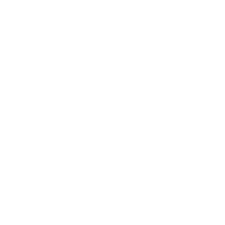

In [5]:
print(soup)

In [12]:
def has_numbers(string: str) -> bool:
    return any(char.isdigit() for char in string)

In [13]:
listing_class = "bdao358l alzwoclg cqf1kptm sl27f92c mmwt03ec s1m0hq7j rj2hsocd mfclru0v qulk4ar7 r0sq1yji"
names = []
prices = []
locations = []
mileages = []

for result in soup.find_all(class_ = listing_class):
    for name in result.find_all(class_ = name_class):
        names.append(name.get_text())
    for price in result.find_all(class_ = price_class):
        prices.append(price.get_text())
    for location in result.find_all(class_ = location_class):
        if (not has_numbers(location.get_text())):
            locations.append(location.get_text())
    for mileage in result.find_all(class_ = mileage_class):
        if (has_numbers(mileage.get_text())):
            mileages.append(mileage.get_text())
        elif (mileage.get_text() == ""):
            mileages.append("")


In [14]:
car_data = list(zip(names, prices, locations, mileages))
df = pd.DataFrame(car_data, columns = ["Name", "Price", "Location", "Mileage"])

In [15]:
df.to_csv("output/car_data.csv")

,Name,Price,Location,Mileage
0,2001 Honda prelude,"C$1,000","Surrey, BC",315K km
1,2000 Volkswagen golf,"C$1,999","Delta, BC",327K km
2,2001 Hyundai tburn,"C$1,300","Port Coquitlam, BC",301K km
3,2000 Volvo s70,"C$2,500","Vancouver, BC",110K km
4,2007 Honda civic,"C$4,500","New Westminster, BC",92K km · Dealership
...,...,...,...,...
228,2022 Chevrolet trailblazzer rs awd,"C$36,998","Surrey, BC",51K km
229,2007 Toyota tundra,"C$19,995","Coquitlam, BC",30K km
230,2019 Mazda cx-5,"C$36,500","Richmond, BC",10K km
231,2022 Mazda cx-9 signature,"C$55,350","Coquitlam, BC",45K km
